<a href="https://colab.research.google.com/github/eskayML/free-ai-classes-2023/blob/main/Free_AI_Classes_Starter_NoteBook_by_eskayML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. IMPORT REQUIRED PACKAGES/ LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# 2. LOAD DATA

In [2]:
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
sample_sub = pd.read_csv('Sample_submission.csv')

In [3]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [4]:
train.size

98000

In [5]:
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


# 3. EDA

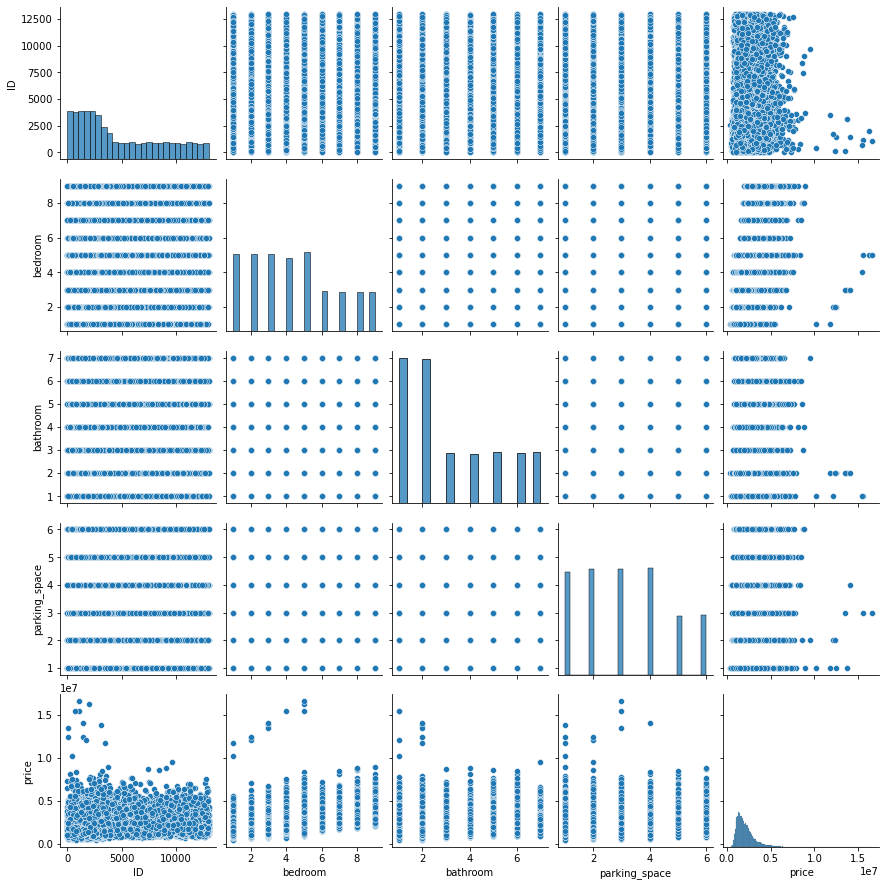

In [7]:
sns.pairplot(train)

<AxesSubplot:xlabel='parking_space', ylabel='count'>

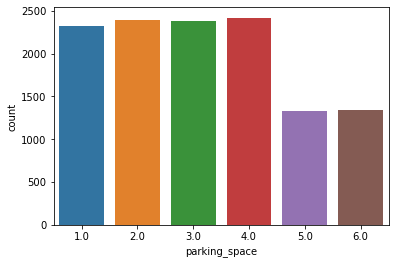

In [8]:
sns.countplot(data = train, x  = 'parking_space')

<AxesSubplot:xlabel='bedroom', ylabel='price'>

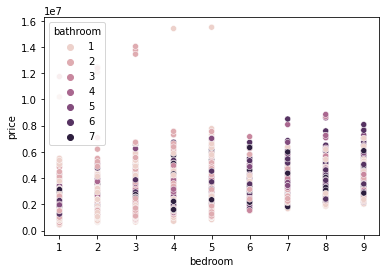

In [9]:
sns.scatterplot(data = train, y  = 'price',x='bedroom', hue = 'bathroom')

# 4. DATA PREPROCESSING




In [10]:
imputer = SimpleImputer(strategy = 'most_frequent')
train[train.columns] = imputer.fit_transform(train)
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,5.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,4.0,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,5.0,7.0,4.0,2367927.861
13996,9704,Kaduna,Apartment,5.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,5.0,6.0,1.0,3348918.718


In [11]:

# label encoding

for i in ['loc', 'title']:
  train[i] = train[i].astype('category')
  test[i] = test[i].astype('category')
  train[i] = train[i].cat.codes
  test[i] = test[i].cat.codes



Type casting the columns to int

train["bedroom"] = train["bedroom"].astype(int)
train["bathroom"] = train["bathroom"].astype(int)
train["parking_space"] = train["parking_space"].astype(int)

test["bedroom"] = test["bedroom"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["parking_space"] = test["parking_space"].astype(int)

In [12]:
train["loc"] = train["loc"].astype('category')
train["title"] = train["title"].astype('category')
train["bedroom"] = train["bedroom"].astype('category')
train["bathroom"] = train["bathroom"].astype('category')
train["parking_space"] = train["parking_space"].astype('category')

In [13]:
train["loc"] = train["loc"].cat.codes
train["title"] = train["title"].cat.codes
train["bedroom"] = train["bedroom"].cat.codes
train["bathroom"] = train["bathroom"].cat.codes
train["parking_space"] = train["parking_space"].cat.codes
#df1["bedroom"] = df1["bedroom"].cat.codes
#df1["bathroom"] = df1["bathroom"].cat.codes
#df1["parking_space"] = df1["parking_space"].cat.codes
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,19,7,1,1,0,1149999.565
1,2748,27,0,4,1,3,1672416.689
2,9261,12,4,6,4,3,3364799.814
3,2224,3,3,4,1,3,2410306.756
4,10300,21,8,4,4,5,2600700.898
...,...,...,...,...,...,...,...
13995,6175,11,1,4,6,3,2367927.861
13996,9704,17,0,4,6,4,2228516.471
13997,11190,30,1,7,5,4,2406812.693
13998,9256,9,4,4,5,0,3348918.718


In [14]:
X,y = train.drop(['ID','price'],axis = 1), train['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 2770, test_size = 0.2)

# 5. TRAINING A MODEL


In [15]:

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
print(rf.score(X_test, y_test))
mean_squared_error(y_test, preds, squared = False) #rmse

0.5720156344499632


665691.6780396728

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#make predictions on validation set
log_preds = model.predict(X_test)
print(model.score(X_test, y_test))
mean_squared_error(y_test, preds, squared = False) #rmse

0.30216078558653137


665691.6780396728

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb = xgb.XGBRegressor()

params = {
    "booster" : ["gbtree", "gblinear", "dart"],
    "verbosity" : [1, 2, 3],
    "learning_rate" : [0.01, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.50, 0.70, 1.00],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "subsample" : [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7],
    "lambda" : [0, 1],
    "tree_method" : ["auto", "exact", "approx", "hist", "gpu_hist"]
}

rs_model = RandomizedSearchCV(xgb, param_distributions=params, n_iter=2, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)


rs_model.fit(X_train, y_train)
rs_model.best_estimator_

In [17]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
print(xgb.score(X_test, y_test))
mean_squared_error(y_test, preds, squared = False) #rmse

0.703371167037905


665691.6780396728

mod.fit(X_train, y_train)

In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, log_preds))
rmse

850035.1033926386

In [19]:
test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,18,6,4,1,2
1,1924,1,0,2,2,4
2,10718,1,1,2,7,2
3,12076,23,5,9,5,2
4,12254,14,7,5,6,1
...,...,...,...,...,...,...
5995,1594,12,4,4,5,2
5996,2416,1,8,5,7,1
5997,10195,29,9,4,1,4
5998,9455,4,4,3,7,5


In [20]:
test["price"] = rf.predict(test.drop(["ID"], axis=1))
test

,ID,loc,title,bedroom,bathroom,parking_space,price
0,845,18,6,4,1,2,2.520585e+06
1,1924,1,0,2,2,4,1.251119e+06
2,10718,1,1,2,7,2,1.467907e+06
3,12076,23,5,9,5,2,7.438806e+06
4,12254,14,7,5,6,1,2.353246e+06
...,...,...,...,...,...,...,...
5995,1594,12,4,4,5,2,1.936423e+06
5996,2416,1,8,5,7,1,2.339267e+06
5997,10195,29,9,4,1,4,2.323450e+06
5998,9455,4,4,3,7,5,2.384984e+06


In [21]:
import xgboost as xgb1
xgb1 = xgb1.XGBRegressor()
xgb1.fit(X_train, y_train)
xgb_y_pred = xgb1.predict(X_test)
print(xgb1.score(X_test, y_test))
mean_squared_error(y_test, preds, squared = False) #rmse

0.703371167037905


665691.6780396728

In [22]:
sub_file = pd.DataFrame({
    'ID': test.ID,
    'price': rf.predict(test[X.columns])
})

sub_file.to_csv('submission.csv', index = False)

THINGS TO IMPROVE MODEL PERFORMANCE
* Try out other algorithms
* Cross validation
* Hyperparameter Tuning
* More EDA
* Feature Engineering / Feature Selection
